In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder



In [3]:
# LOAD DATA
df = pd.read_csv("/content/sample_data/medical_instrument_data_5000.csv")
df.head()

,instrument_id,customer_behavior_score,number_of_uses,surgery_type,surgery_complexity,surgeon_experience_level,time_since_last_maintenance_days,previous_repair_count,sterilization_frequency,failure_count_last_12_months
0,INS-0001,0.62,100,General,Medium,Resident,28,4,15,0
1,INS-0002,0.97,281,Orthopedic,Medium,Intermediate,79,4,15,3
2,INS-0003,0.84,120,Orthopedic,Low,Intermediate,124,4,28,0
3,INS-0004,0.76,273,Orthopedic,Medium,Intermediate,170,3,17,4
4,INS-0005,0.49,97,Orthopedic,Medium,Intermediate,105,2,18,1


In [4]:
#DATA INSPECTION
df.info()
df.describe()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   instrument_id                     5000 non-null   object 
 1   customer_behavior_score           5000 non-null   float64
 2   number_of_uses                    5000 non-null   int64  
 3   surgery_type                      5000 non-null   object 
 4   surgery_complexity                5000 non-null   object 
 5   surgeon_experience_level          5000 non-null   object 
 6   time_since_last_maintenance_days  5000 non-null   int64  
 7   previous_repair_count             5000 non-null   int64  
 8   sterilization_frequency           5000 non-null   int64  
 9   failure_count_last_12_months      5000 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 390.8+ KB


np.int64(0)

In [5]:
#DATA CLEANING
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
for col in df.select_dtypes(include=["float", "int"]).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2370973350.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2370973350.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [6]:
#ENCODING CATEGORICAL FIELDS
cat_cols = ["surgery_complexity", "surgeon_experience_level"]

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [7]:
#FEATURE ENGINEERING
df["usage_intensity"] = df["number_of_uses"] / (df["time_since_last_maintenance_days"] + 1)
df["sterilization_ratio"] = df["sterilization_frequency"] / (df["number_of_uses"] + 1)
df["repair_to_use_ratio"] = df["previous_repair_count"] / (df["number_of_uses"] + 1)

df.head()

,instrument_id,customer_behavior_score,number_of_uses,surgery_type,surgery_complexity,surgeon_experience_level,time_since_last_maintenance_days,previous_repair_count,sterilization_frequency,failure_count_last_12_months,usage_intensity,sterilization_ratio,repair_to_use_ratio
0,INS-0001,0.62,100,General,2,2,28,4,15,0,3.448276,0.148515,0.039604
1,INS-0002,0.97,281,Orthopedic,2,1,79,4,15,3,3.512500,0.053191,0.014184
2,INS-0003,0.84,120,Orthopedic,1,1,124,4,28,0,0.960000,0.231405,0.033058
3,INS-0004,0.76,273,Orthopedic,2,1,170,3,17,4,1.596491,0.062044,0.010949
4,INS-0005,0.49,97,Orthopedic,2,1,105,2,18,1,0.915094,0.183673,0.020408


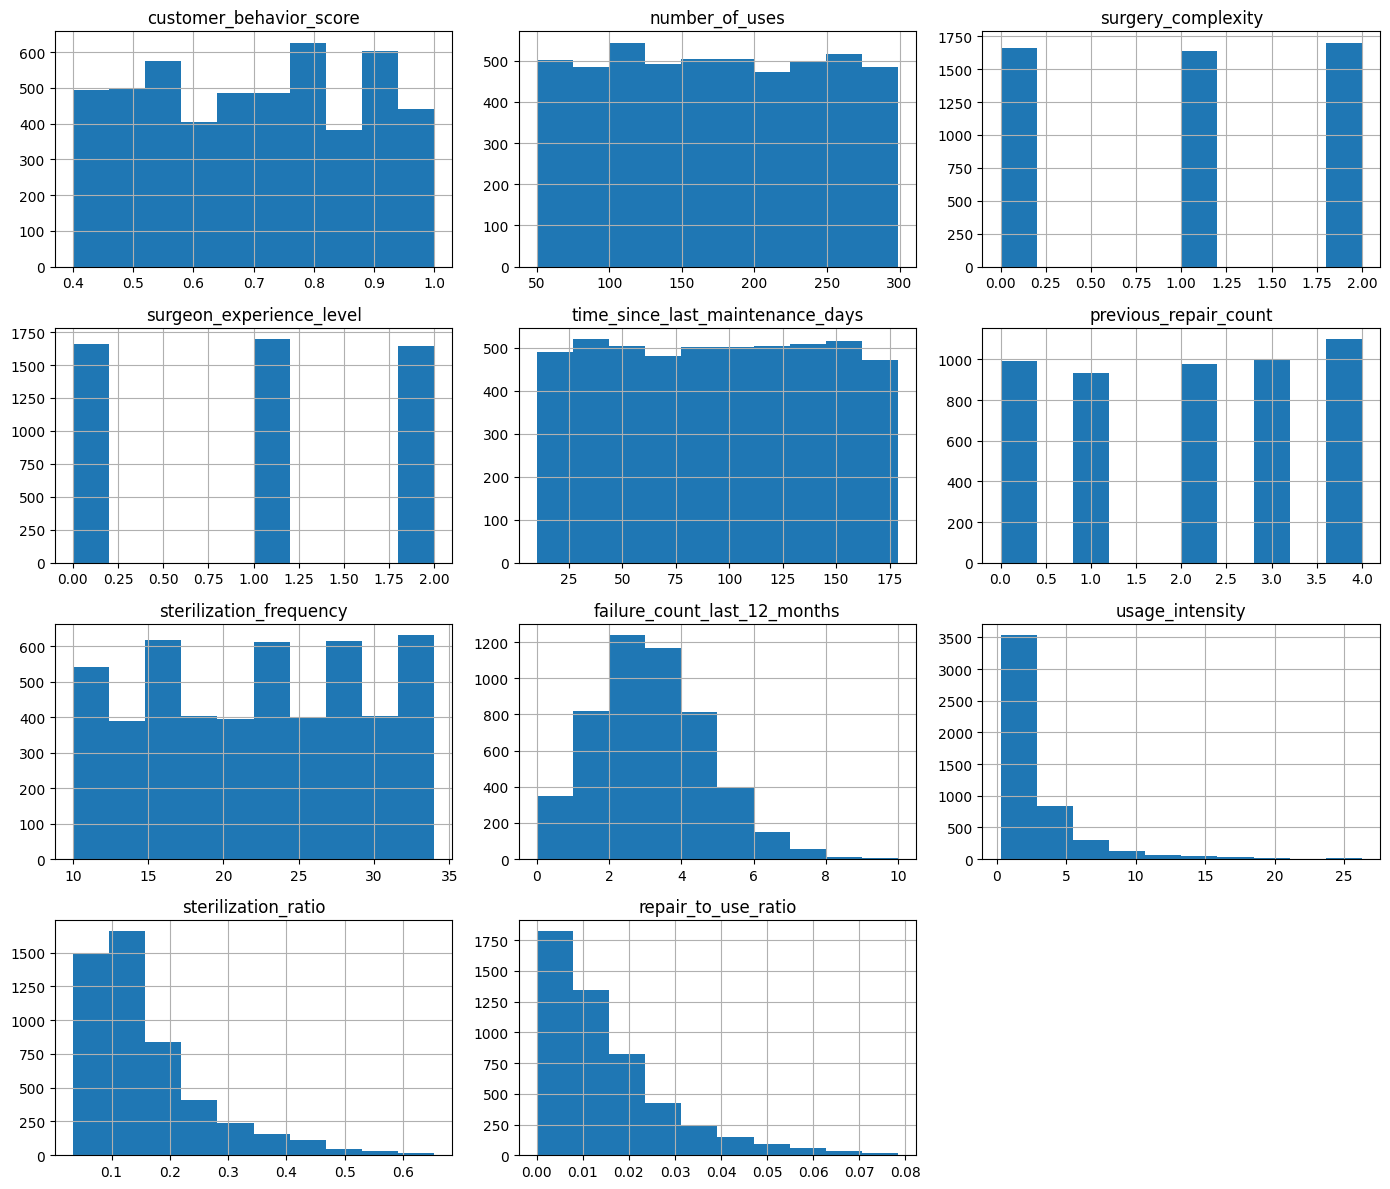

In [8]:
#EXPLORATORY DATA ANALYSIS (EDA)
#Histograms
df.hist(figsize=(14, 12))
plt.tight_layout()
plt.show()

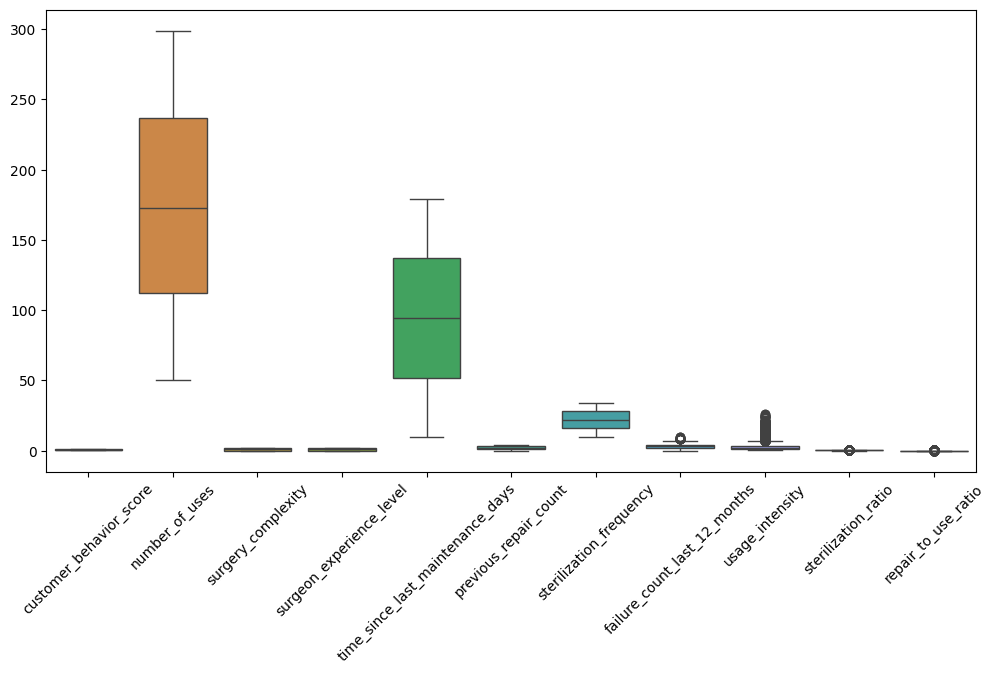

In [9]:
#Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.show()

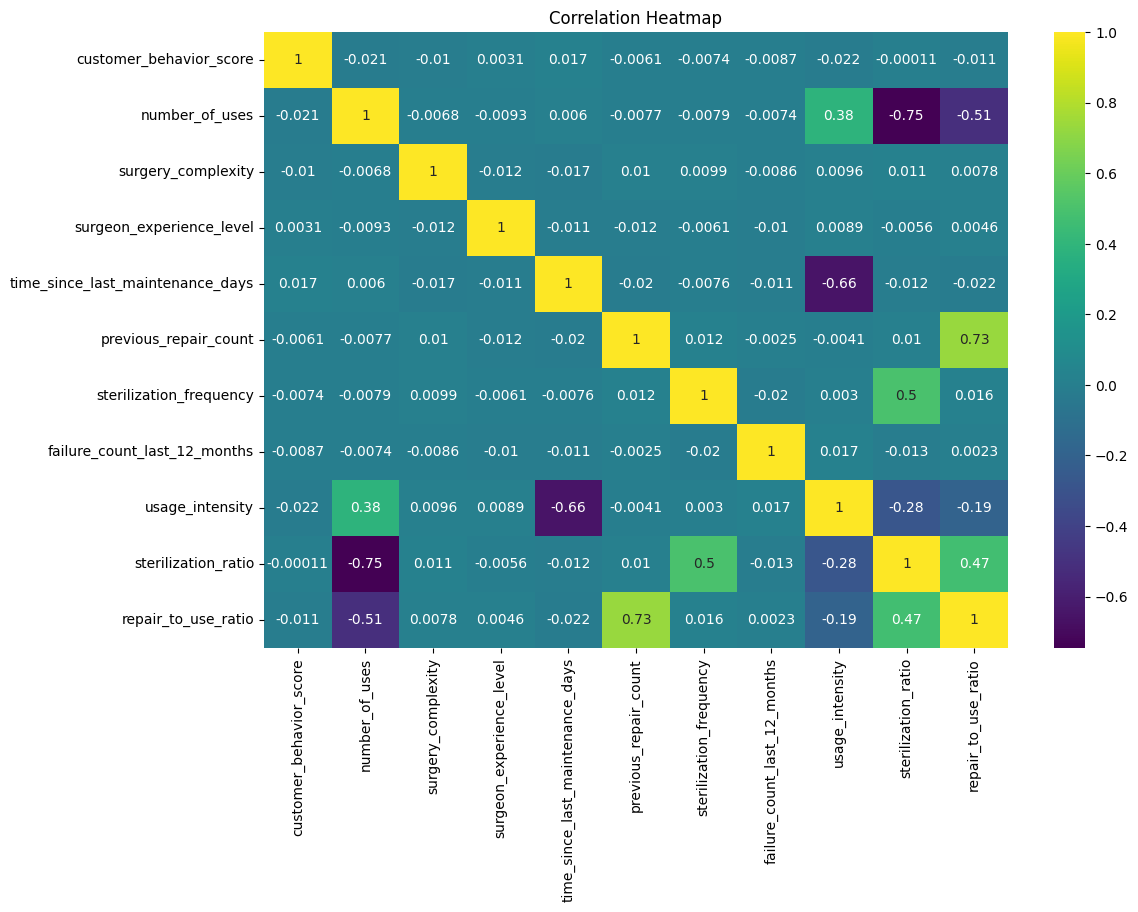

In [10]:
#Correlation Heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

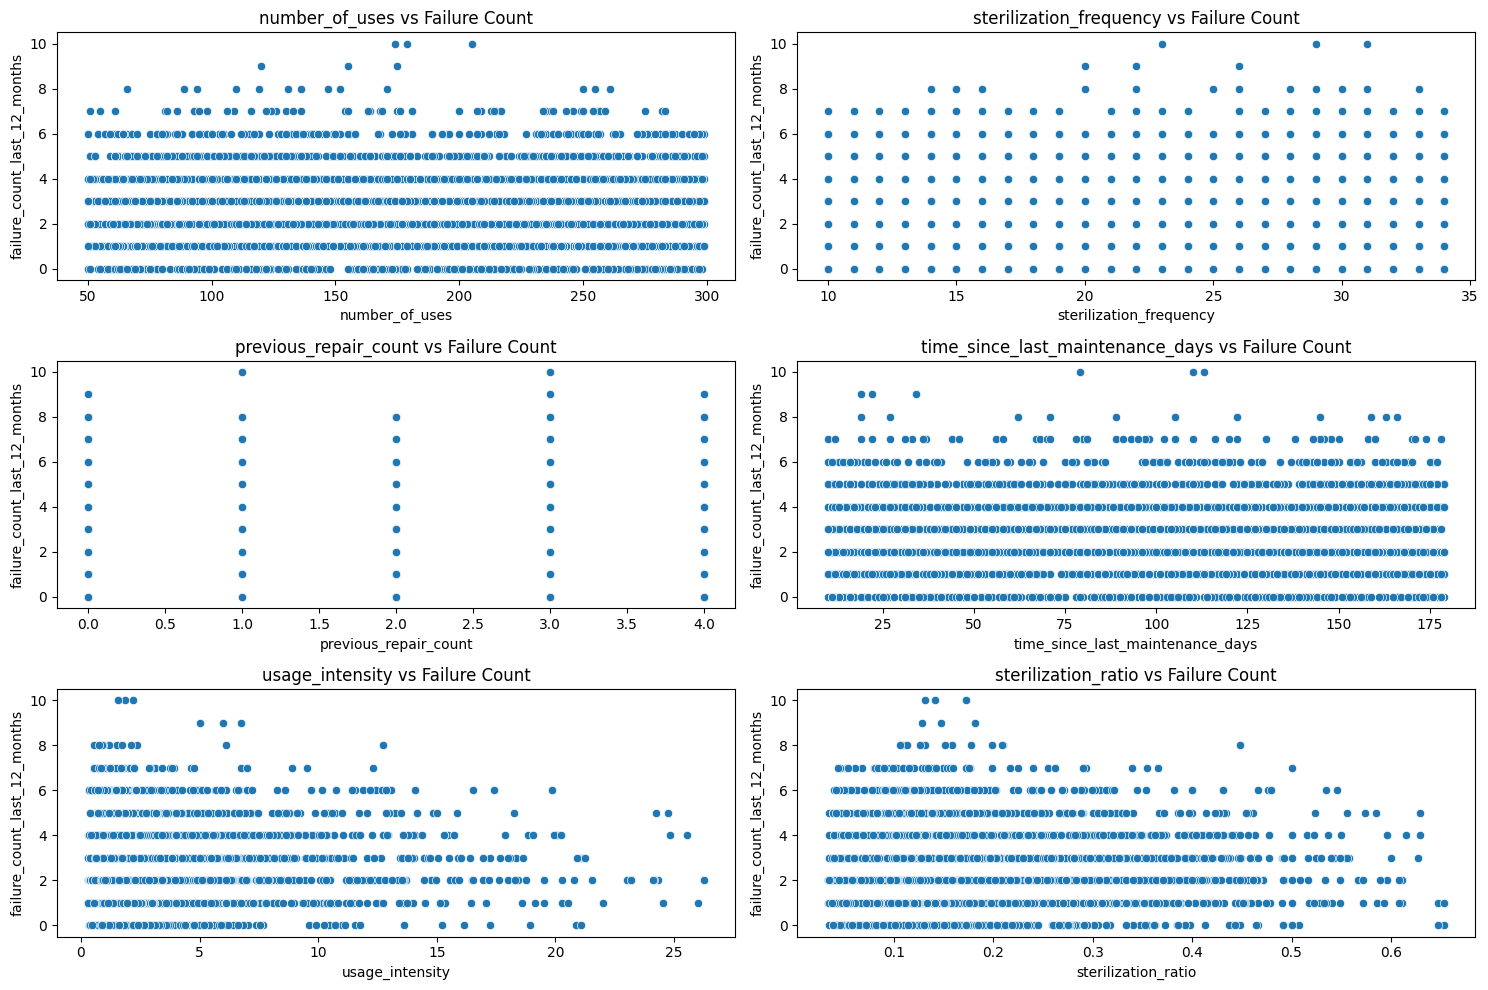

In [11]:
#Scatterplots
features = ["number_of_uses", "sterilization_frequency", "previous_repair_count",
            "time_since_last_maintenance_days", "usage_intensity", "sterilization_ratio"]

plt.figure(figsize=(15,10))

for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[col], y=df["failure_count_last_12_months"])
    plt.title(f"{col} vs Failure Count")

plt.tight_layout()
plt.show()

In [15]:
#BASELINE MODELING
#Train/Test Split
X = df.drop(columns=['instrument_id', 'failure_count_last_12_months','surgery_type'], axis=1)
y = df["failure_count_last_12_months"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [16]:
X_train.dtypes

,0
customer_behavior_score,float64
number_of_uses,int64
surgery_complexity,int64
surgeon_experience_level,int64
time_since_last_maintenance_days,int64
previous_repair_count,int64
sterilization_frequency,int64
usage_intensity,float64
sterilization_ratio,float64
repair_to_use_ratio,float64


In [17]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

lr_mae, lr_rmse

(1.2729797454486425, np.float64(1.5890701341684612))

In [18]:
#Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

rf_mae, rf_rmse

(1.3013466666666669, np.float64(1.6299511989968016))

In [19]:
#Model Comparison
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [lr_mae, rf_mae],
    "RMSE": [lr_rmse, rf_rmse]
})

results

,Model,MAE,RMSE
0,Linear Regression,1.272980,1.589070
1,Random Forest,1.301347,1.629951


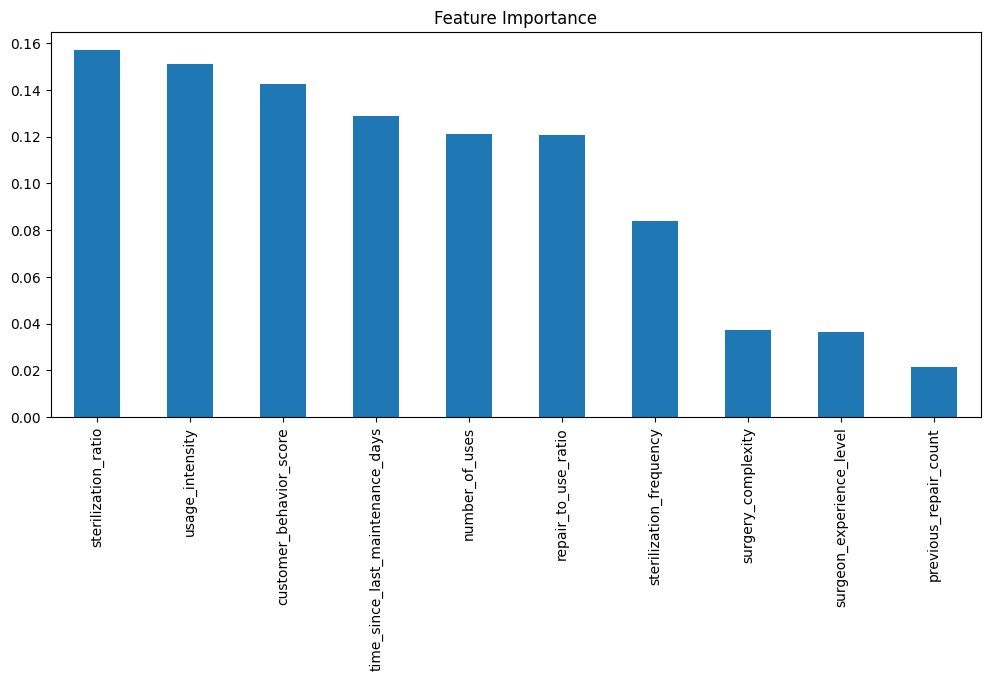

In [20]:
#Feature Importance (Random Forest)
imp = pd.Series(rf.feature_importances_, index=X.columns)
imp.sort_values(ascending=False).plot(kind="bar", figsize=(12,5), title="Feature Importance")
plt.show()